In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np
import time

## 0. 변수에 상수 대입

In [2]:
cap_a = 1
alpha = 0.30
beta = 0.95
epsilon = 0.0001

## 1. 필요한 funtion들 construct

### 1-1 초기값, 마지막값, 간격의 갯수를 parameter로 grid generating function construct

In [3]:
def gridmaker(start, end, N):
    """
    grid의 가장 작은 값과 큰 값, 그리고 원하는 grid point의 총 갯수를 받아서 
    list of grid를 반환해주는 함수 
    """
    step = float((end - start)/(N-1))
    target = [start]
    
    for i in range(1,N):
        target.append(start+i*step)
    
    return target

### 1-2 V_old 와 V_new 사이의 distance measure 해주는 function (euclidean distance)

In [4]:
def validator(V_old, V_new):
    """
    value function값 업데이트 해줄때,
    old와 new의 euclidean diatnce 가 threshold보다는 작아질 때까지 루프 돌릴 것임.
    euclidean distance를 mesasure 해주는 function
    """
    dist_list = [(V_old[i]-V_new[i])**2 for i in range(len(V_old))]
    distance = math.sqrt(sum(dist_list))
    return distance

In [21]:
a = [1,2,3]
b = [4,5,6]
validator(a, b)

5.196152422706632

## 2. grid search construct

In [5]:
grid_num = 30 #grid의 갯수 지정해준다
grid = gridmaker(0.01 , 1.5, grid_num)

### solve the problem w/ given sample of gird

##### STEP1 get consumption matrix (list of lists)

In [6]:
# set V_0 = zeor vector 
V_0 = [ 0 for i in range(grid_num)]

consumption = []
utility_consumption = []
#consumption list의 첫번째 list component는 consumption matrix의 첫번째 행을 의미

for i in grid:        # i denotes K
    row = []
    row_utility = []
    for j in grid:    # j denotes K'
        con_ij =  cap_a*(i**alpha) - j
        if con_ij < 0:
            row.append(epsilon)
            row_utility.append(math.log(epsilon))
        else:
            row.append(con_ij)
            row_utility.append(math.log(con_ij))
    consumption.append(row)
    utility_consumption.append(row_utility)

##### STEP2 get matrix of u(C) + beta*V  & V_new --> update

In [7]:
start_time = time.time()
V_old = V_0
diff_value = 1
trial = 0

while diff_value >= epsilon:
    V_new = []
    discounted_V_old = [beta*i for i in V_old]  # list of beta * V
    result = []   # result list 안에 u(C) + beta*V 정보 넣어줄 것임
    for i in range(grid_num): 
        target = [utility_consumption[i][j] + discounted_V_old[j] for j in range(grid_num)]
        V_new.append(max(target))
        result.append(target)

    diff_value = validator(V_new, V_old)
    #diff_value = np.max(np.abs(np.array(V_new)-np.array(V_old)))
    V_old = V_new
    trial += 1

end_time = time.time() - start_time
# grid search로 구한 decision rule에 따른 K_prime의 값 저장
saving_grid = []
for i_list in result:
    k_prime = grid[i_list.index(max(i_list))]
    saving_grid.append(k_prime)

# saving function 에서 구한 K_prime의 값 저장
test_plot = []
for i in range(grid_num):
    test = grid[i]
    test_plot.append(alpha*beta*(test**alpha))

In [259]:
V_30 = V_old

In [263]:
V_90 = V_old

In [222]:
print("under grid 30, # of iteration is ", trial)

under grid 30, # of iteration is  212


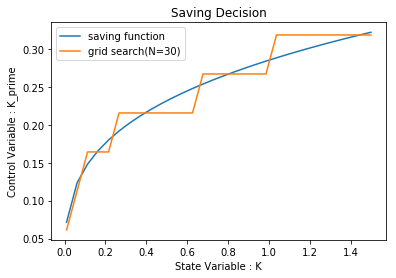

In [220]:
plt.plot(grid, test_plot)
plt.plot(grid, saving_grid)
plt.xlabel('State Variable : K')
plt.ylabel('Control Variable : K_prime')
plt.title('Saving Decision')
plt.legend(['saving function', 'grid search(N=30)'])
plt.show()

<pre>
grid를 30으로 설정 하였을 때 grid search 방식으로 구해낸 saving decision이 (주황색)
, 문제 (3)에서 구한 saving decision과 (파란색) 유사한 트렌드를 보이고 있음을 확인할 수 있다.
다만 그리드가 너무 듬성듬성 잡혀 있어, 엄밀하게 잡아내지는 못하고 있다.
</pre>

In [227]:
print("under grid 300, # of iteration is ", trial)

under grid 300, # of iteration is  234


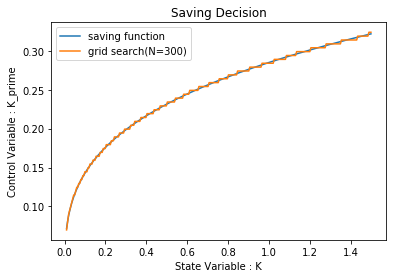

In [228]:
plt.plot(grid, test_plot)
plt.plot(grid, saving_grid)
plt.xlabel('State Variable : K')
plt.ylabel('Control Variable : K_prime')
plt.title('Saving Decision')
plt.legend(['saving function', 'grid search(N=300)'])
plt.show()

<pre>
grid의 수를 300으로 늘려서 확인해본 결과, 
두 그래프의 트렌드가 상당히 유사해진 것을 확인할 수 있다.
</pre>

## 3. 과제 문제 풀이

### Question (d)

<pre>
위의 2번에서, value function iteration을 하는 코드를 작성하였습니다.
alpha = 0.3
beta = 0.95
A = 1
그리드의 하한은 0.001 상한은 1.5로 설정했습니다.
</pre>

In [237]:
print("total running time with grid of 30 is ", end_time)
print("total number of iteration with grid of 30 is ", trial)

total running time with grid of 30 is  0.03519487380981445
total number of iteration with grid of 30 is  212


### Question (e), (f)

In [254]:
# howard's improvement
V_old = V_0
diff_value = 1
trial = 0
n_H = 50
start_time = time.time()

while diff_value >= epsilon:
    V_new = []
    discounted_V_old = [beta*i for i in V_old]  # list of beta * V
    result = []   # result list 안에 u(C) + beta*V 정보 넣어줄 것임
    
    if trial % n_H == 0 or trial == 0:   # 모듈로 통해서 trial 횟수가 5의 배수가 될 때마다 max 취해주기
        index = []
        for i in range(grid_num): 
            target = [utility_consumption[i][j] + discounted_V_old[j] for j in range(grid_num)]
            V_new.append(max(target))
            result.append(target)
            index.append(target.index(max(target)))
    else:
        for i in range(grid_num):
            V_new.append(utility_consumption[i][index[i]] + discounted_V_old[index[i]])
        
    diff_value = validator(V_new, V_old)
    #diff_value = np.max(np.abs(np.array(V_new)-np.array(V_old)))
    V_old = V_new
    trial += 1

end_time = time.time() - start_time
    

In [251]:
print("total running time with n_H of 2 is ", end_time)
print("total number of iteration with n_H of 2 is ", trial)

total running time with n_H of 2 is  0.02642512321472168
total number of iteration with n_H of 2 is  211


In [253]:
print("total running time with n_H of 5 is ", end_time)
print("total number of iteration with n_H of 5 is ", trial)

total running time with n_H of 5 is  0.01418614387512207
total number of iteration with n_H of 5 is  209


In [255]:
print("total running time with n_H of 50 is ", end_time)
print("total number of iteration with n_H of 50 is ", trial)

total running time with n_H of 50 is  0.006845951080322266
total number of iteration with n_H of 50 is  255


<pre>
n_H의 값이 커지면서, iteration의 횟수는 증가하지만,
코드의 running time이 줄어드는 것을 확인할 수 있다.
</pre>

### Question (g)

In [266]:
true_value = []
for k in grid:
    value = (alpha/(1-alpha*beta))*math.log(k) + (1/(1-beta))*(math.log(cap_a*(1-alpha*beta)) + (alpha*beta/(1-alpha*beta))*math.log(cap_a*alpha*beta))
    true_value.append(value)

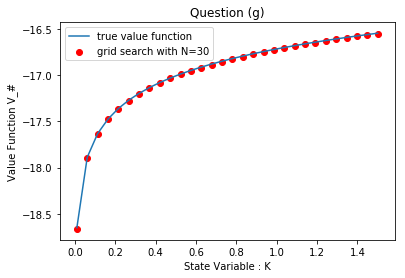

In [273]:
plt.scatter(grid, V_30, color = 'r')
plt.plot(grid, true_value)
plt.xlabel('State Variable : K')
plt.ylabel('Value Function V_#')
plt.title('Question (g)')
plt.legend([ 'true value function', 'grid search with N=30'])
plt.show()

두 개의 그래프가 육안으로 보기에 겹쳐져 그려지는 것을 확인할 수 있다.

In [274]:
dist = []
for i in range(len(true_value)):
    dist.append(np.abs(V_30[i]-true_value[i]))

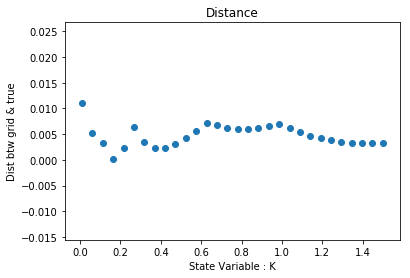

In [276]:
plt.scatter(grid, dist)
plt.xlabel('State Variable : K')
plt.ylabel('Dist btw grid & true')
plt.title('Distance')
plt.show()

두 값의 차가 0가 가까운 근소한 차이만 보이는 것을 알 수 있다.

### Question (h)

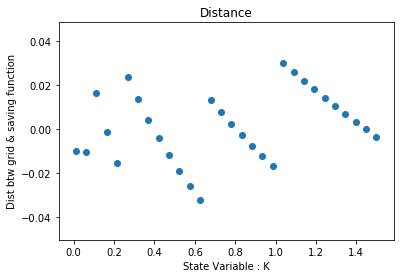

In [281]:
dist_30 = []
for i in range(grid_num):
    dist_30.append(saving_grid[i] - test_plot[i])

plt.scatter(grid, dist_30)
plt.xlabel('State Variable : K')
plt.ylabel('Dist btw grid & saving function')
plt.title('Distance when N = 30')
plt.show()

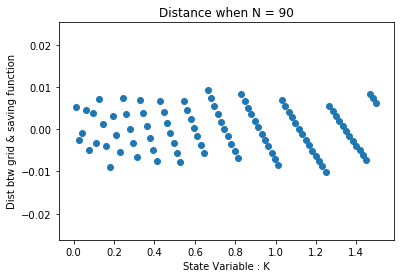

In [285]:
dist_90 = []
for i in range(grid_num):
    dist_90.append(saving_grid[i] - test_plot[i])

plt.scatter(grid, dist_90)
plt.xlabel('State Variable : K')
plt.ylabel('Dist btw grid & saving function')
plt.title('Distance when N = 90')
plt.show()

### Question (i)

In [9]:
from scipy.interpolate import interp1d

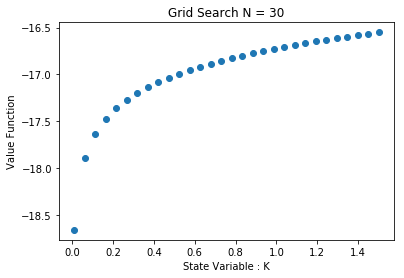

In [16]:
plt.plot(grid, V_old, 'o')
plt.xlabel('State Variable : K')
plt.ylabel('Value Function')
plt.title('Grid Search N = 30')
plt.show()

###### value function

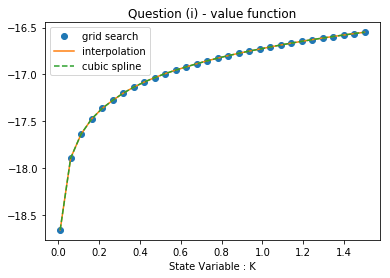

In [47]:
f = interp1d(grid, V_old)
f2 = interp1d(grid, V_old, kind = 'cubic')
grid_new = gridmaker(0.01, 1.5, 30)
plt.plot(grid, V_old, 'o', grid_new, f(grid_new), '-', grid_new, f2(grid_new), '--')
plt.xlabel('State Variable : K')
plt.title('Question (i) - value function')
plt.legend(['grid search', 'interpolation', 'cubic spline'])
plt.show()

###### policy function

In [49]:
#Real
real_plot = []
for i in range(grid_num):
    test = grid[i]
    real_plot.append(alpha*beta*(test**alpha))

In [51]:
# Grid search
saving_grid = []
for i_list in result:
    k_prime = grid[i_list.index(max(i_list))]
    saving_grid.append(k_prime)

In [61]:
#  Interpolation and Spline
q1 = interp1d(grid, saving_grid)
q2 = interp1d(grid, saving_grid, 'cubic')
p1 = interp1d(grid, real_plot)
p2 = interp1d(grid, real_plot, 'cubic')

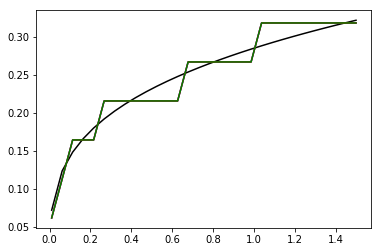

In [66]:
plt.plot(grid, saving_grid, color = 'blue')
plt.plot(grid, real_plot, color = 'black')
plt.plot(grid, q1(grid), color = 'red')
plt.plot(grid, q2(grid), color = 'green')
plt.show()